In [1]:
import scanpy as sc
import scFates as scf

In [2]:
adata = sc.read("adata_tree.h5ad")

In [3]:
root="Progenitors"
miles=["Hypodermis","Seam_cells"]

In [4]:
scf.tl.test_fork(adata,root,miles,n_jobs=40,rescale=True)

testing fork
    single mapping


/home/lfaure/scFates/scFates/tools/bifurcation_tools.py:157: FutureWarning: In a future version of pandas all arguments of Index.drop_duplicates will be keyword-only.
  brcells = brcells.loc[brcells.index.drop_duplicates(False)]


    Differential expression: 100%|██████████| 2420/2420 [00:58<00:00, 41.62it/s]
    test for upregulation for each leave vs root
    upreg Seam_cells: 100%|██████████| 1151/1151 [00:02<00:00, 516.49it/s]
    finished (0:01:04) --> added 
    .uns['Progenitors->Hypodermis<>Seam_cells']['fork'], DataFrame with fork test results.


In [5]:
scf.tl.branch_specific(adata,root,miles,effect=1)

    branch specific features: Hypodermis: 71, Seam_cells: 33
    finished --> updated 
    .uns['Progenitors->Hypodermis<>Seam_cells']['fork'], DataFrame updated with additionnal 'branch' column.


In [6]:
scf.tl.activation(adata,root,miles,n_jobs=80,n_map=100)

testing activation
    mapping: 100%|██████████| 100/100 [02:35<00:00,  1.56s/it]
    threshold pseudotime is: 2.0934175367156924
    39 early and 32 late features specific to leave Hypodermis
    23 early and 10 late features specific to leave Seam_cells
    finished (0:02:35) --> updated 
    .uns['Progenitors->Hypodermis<>Seam_cells']['fork'], DataFrame updated with additionnal 'activation' and 'module' columns.


In [22]:
sc.pp.pca(adata)
scf.pp.diffusion(adata)

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.


Running Diffusion maps 
Determing nearest neighbor graph...
    determining multiscale diffusion space
    finished (0:00:00) --> added 
    .obsm['X_diffusion_multiscale'], multiscale diffusion space.


In [23]:
sc.pp.neighbors(adata,n_neighbors=50,use_rep="X_diffusion_multiscale")

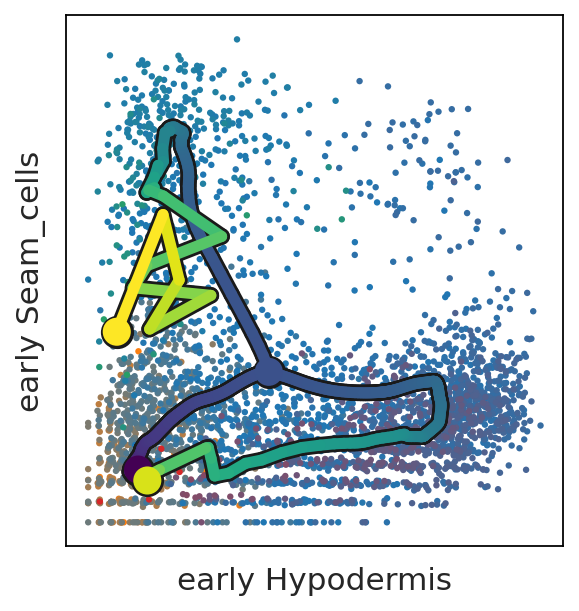

In [26]:
sc.set_figure_params()
scf.pl.modules(adata,root,miles,show_traj=True,module="early")

In [27]:
scf.tl.slide_cells(adata,root,miles,win=100)

--> added 
    .uns['Progenitors->Hypodermis<>Seam_cells']['cell_freq'], probability assignment of cells on 40 non intersecting windows.


In [28]:
scf.tl.slide_cors(adata,root,miles)

--> added 
    .uns['Progenitors->Hypodermis<>Seam_cells']['corAB'], gene-gene correlation modules.


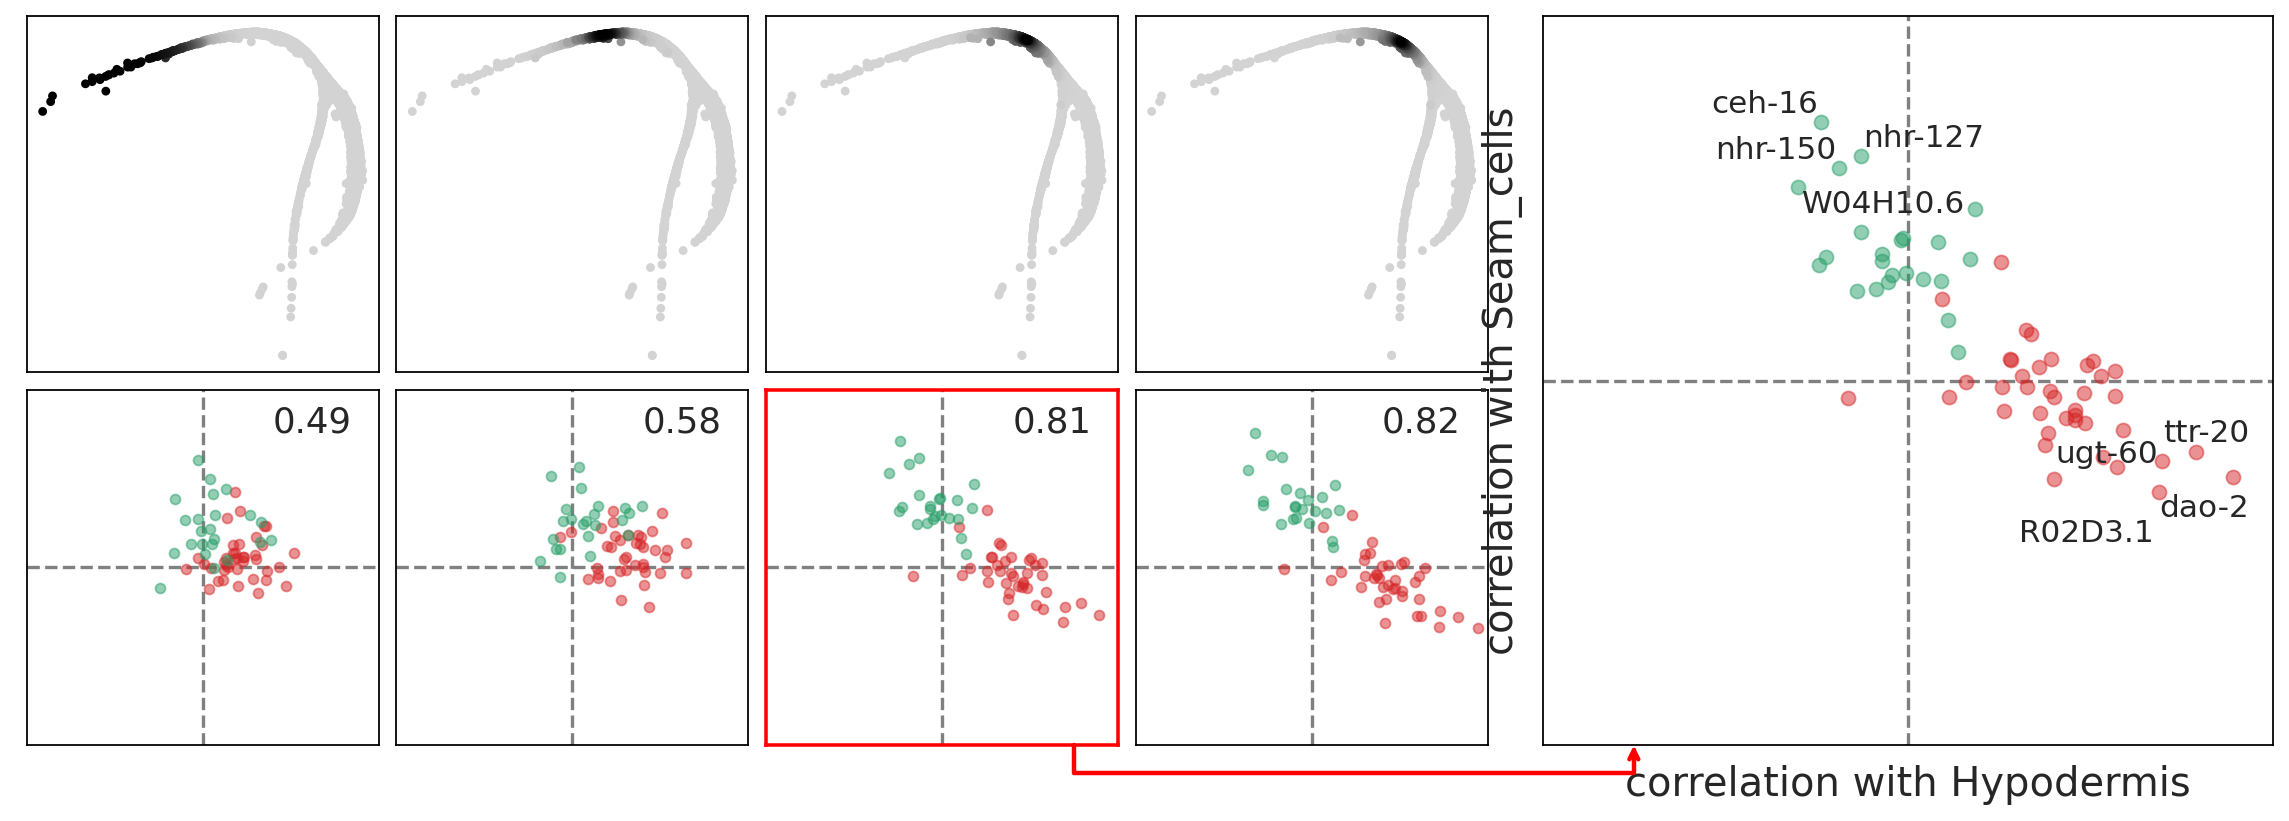

In [44]:
scf.pl.slide_cors(adata,root,miles,basis="draw_graph_fa",win_keep=[0,2,6,7],focus=2)

In [31]:
scf.tl.synchro_path(adata,root,miles,w=50,step=15,n_jobs=80,n_map=100,knots=5)

computing local correlations
    multi mapping permutations: 100%|██████████| 100/100 [00:41<00:00,  2.41it/s]
    finished (0:01:41) --> added 
    .uns['Progenitors->Hypodermis<>Seam_cells']['synchro'], mean local gene-gene correlations of all possible gene pairs inside one module, or between the two modules.
    .obs['inter_cor Progenitors->Hypodermis<>Seam_cells'], GAM fit of inter-module mean local gene-gene correlations prior to bifurcation.


findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


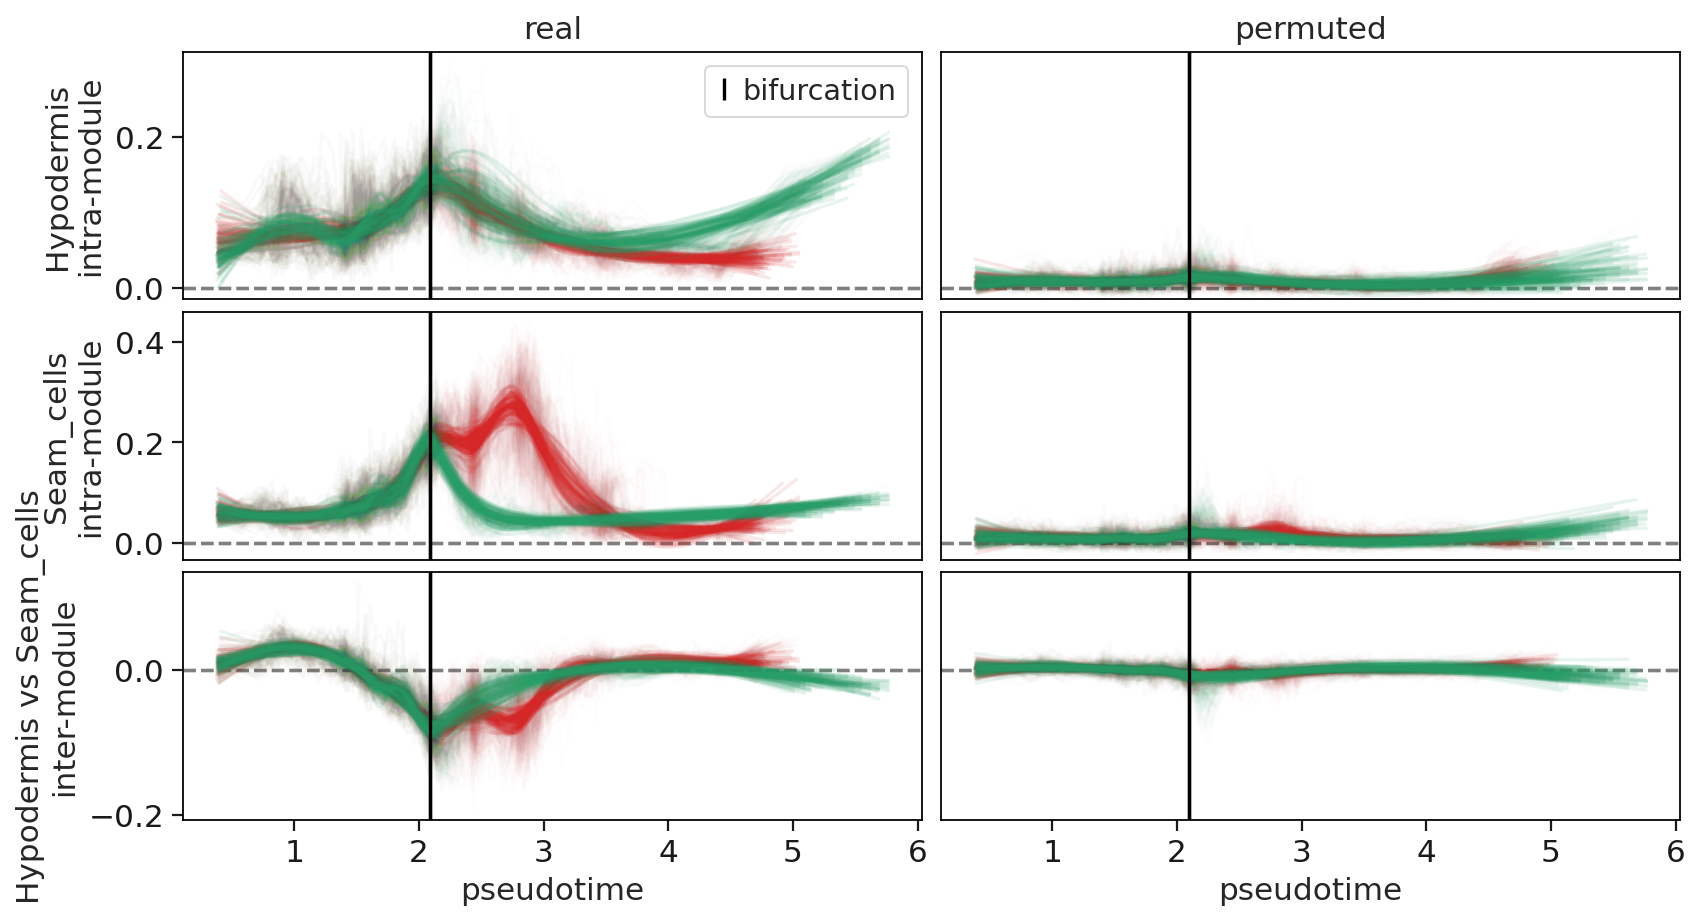

In [32]:
scf.pl.synchro_path(adata,root,miles)

<AxesSubplot:title={'center':'inter-correlation\nHypodermis<>Seam cells'}, xlabel='FA1', ylabel='FA2'>

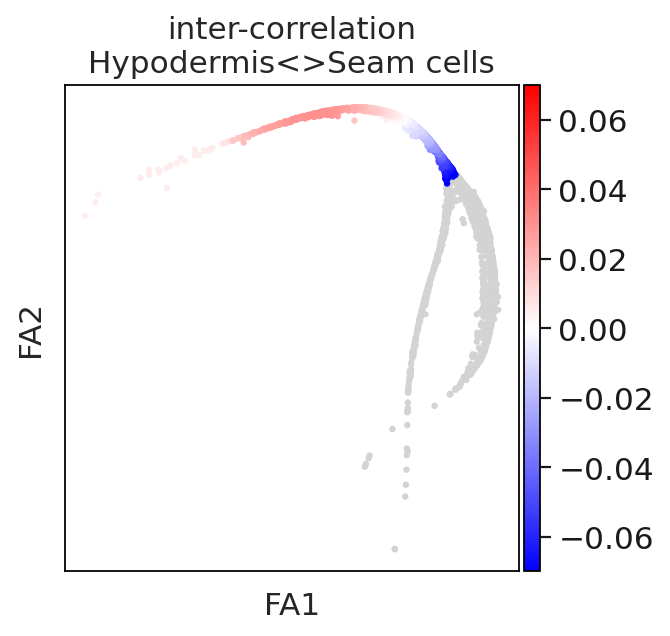

In [37]:
sc.pl.draw_graph(adata,color="inter_cor Progenitors->Hypodermis<>Seam_cells",cmap="bwr",
                 title="inter-correlation\nHypodermis<>Seam cells",vmax=0.07,vmin=-0.07,show=False)

In [52]:
adata.write("adata_final.h5ad")

In [51]:
del adata.raw